In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from green_concrete.convert import *

%matplotlib inline

**Graphs for SULI Research Paper and Poster Presentation** 

*Evan Sharafuddin*

### Comparison with CEMCAP
#### Import Data

In [9]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_cemcap_compare_IA_31-07-2023_11.32.10.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

cols = ['Unnamed: 2', 'Unnamed: 4']
data = f[cols]
my_model_cost = [round(n) for n in f['Unnamed: 2'].values]
my_model_emissions = [round(n) for n in f['Unnamed: 4'].values]

# source for the following: CEMCAP d4.6
cemcap_cost = [round(n) for n in eur2014(1, *[46, 68.4, 77.8])]
cemcap_emissions = [round(n) for n in [
                        850 * .737, # kg/t cli * cli/cem
                        (110-99) * (8760/1e6) * .737 * 1e3, # middle: t/h * h/t cli * cli/cem * kg/t = kg co2/t cem
                        79.1 * .737, # kg/t cli * cli/cem
                    ]] 

#### Costs

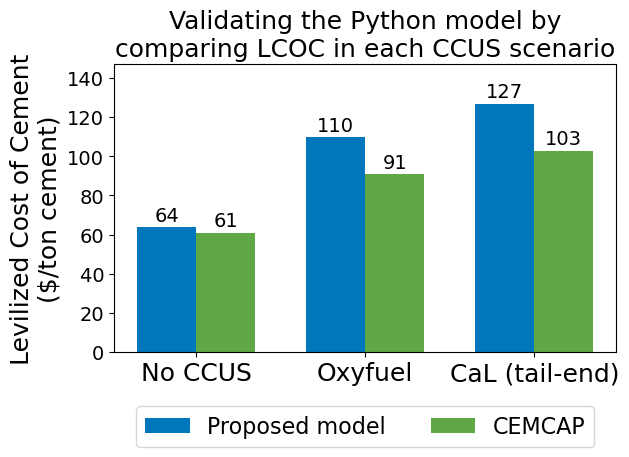

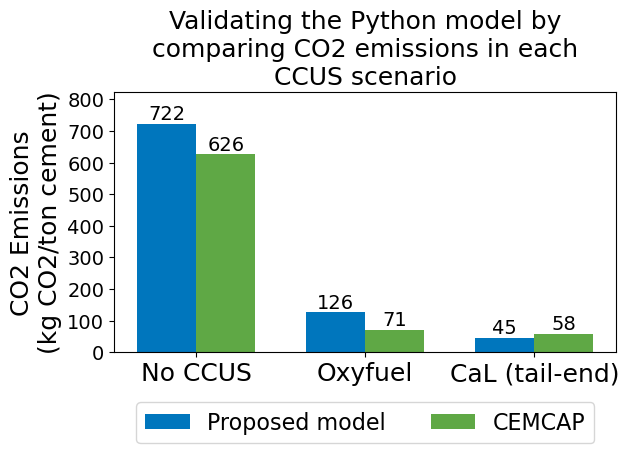

In [10]:
### Costs

# Set the width of the bars
bar_width = 0.35
# figure(figsize=(4, 3), dpi=800)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

# Create the bar plot with two adjacent columns for each group
plt.bar(x - bar_width/2, my_model_cost, width=bar_width, label='Proposed model', color='#0076BD')
plt.bar(x + bar_width/2, cemcap_cost, width=bar_width, label='CEMCAP', color='#5FA845')

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=18)
plt.title('Validating the Python model by\ncomparing LCOC in each CCUS scenario', fontsize=18)
plt.xticks(x, group_labels, fontsize=18)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=16)

for i, v1, v2 in zip(x, my_model_cost, cemcap_cost):
    plt.text(i - bar_width/2, v1 + 1, str(v1), ha='center', va='bottom', color='black', fontsize=14)
    plt.text(i + bar_width/2, v2 + 1, str(v2), ha='center', va='bottom', color='black', fontsize=14)

plt.ylim(top=max(max(my_model_cost), max(cemcap_cost)) + 20)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, 'cemcap_comparison_cost.png'), dpi=800)
# Show the plot

plt.show()



#### Emissions

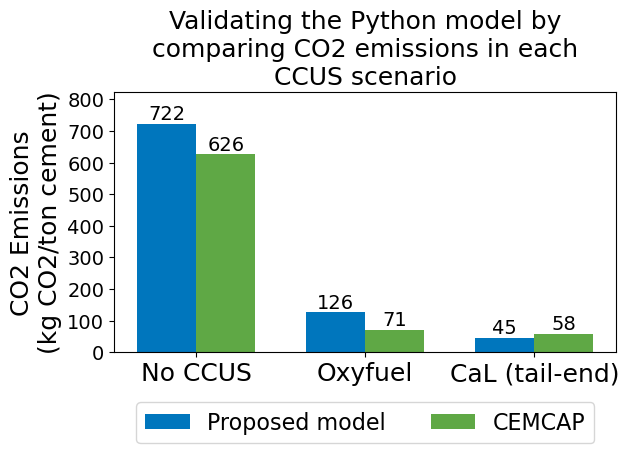

In [13]:
# Set the width of the bars
bar_width = 0.35
# figure(figsize=(4, 3), dpi=800)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

# Create the bar plot with two adjacent columns for each group
plt.bar(x - bar_width/2, my_model_emissions, width=bar_width, label='Proposed model', color='#0076BD')
plt.bar(x + bar_width/2, cemcap_emissions, width=bar_width, label='CEMCAP', color='#5FA845')

# Add labels and title
plt.ylabel('CO2 Emissions\n(kg CO2/ton cement)', fontsize=18)
plt.title('Validating the Python model by\ncomparing CO2 emissions in each\nCCUS scenario', fontsize=18)
plt.xticks(x, group_labels, fontsize=18)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=16)

for i, v1, v2 in zip(x, my_model_emissions, cemcap_emissions):
    plt.text(i - bar_width/2, v1 + 1, str(v1), ha='center', va='bottom', color='black', fontsize=14)
    plt.text(i + bar_width/2, v2 + 1, str(v2), ha='center', va='bottom', color='black', fontsize=14)

plt.ylim(top=max(max(my_model_emissions), max(cemcap_emissions)) + 100)
plt.tight_layout()

plt.savefig(os.path.join(outloc, 'cemcap_comparison_emissions.png'), dpi=600)
# Show the plot
plt.show()


### Substituting coal and petcoke with natural gas

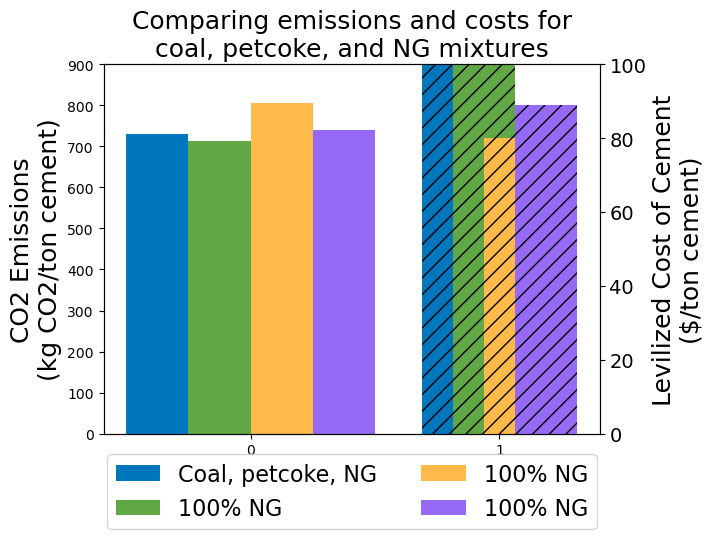

In [71]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_ng_h2_offgrid_31-07-2023_15.55.23.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

cols = ['Unnamed: 2', 'Unnamed: 4']
data = f[cols]
cost = [round(n) for n in f['Unnamed: 2'].values]
emissions = [round(n) for n in f['Unnamed: 4'].values]

cp_cost = cost[0]
cp_emissions = emissions[0]
ng_cost = cost[1]
ng_emissions = emissions[1]
h21_c = cost[2]
h22_c = cost[3]
h21_e = emissions[2]
h22_e = emissions[3]

# Set the width of the bars
bar_width = 0.25
# figure(figsize=(4, 3), dpi=800)
group_labels = ['Coal, petcoke, NG', '100% NG', '90% NG, 20% H2', '80% NG, 20% H2']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.set_ylim(0, 900)
ax2.set_ylim(0, 100)

ax1.bar(0 - 3 * bar_width/2, cp_emissions, width=bar_width, label=group_labels[0], color='#0076BD')
ax1.bar(0 - bar_width/2, ng_emissions, width=bar_width, label=group_labels[1], color='#5FA845')
ax1.bar(0 + bar_width/2, h21_e, width=bar_width, label=group_labels[1], color='#FFBA49')
ax1.bar(0 + 3 * bar_width/2, h22_e, width=bar_width, label=group_labels[1], color='#976AF5')

ax2.bar(1 - 3 * bar_width/2, cp_cost, width=bar_width, label=group_labels[0], color='#0076BD', hatch='//')
ax2.bar(1 - bar_width/2, ng_cost, width=bar_width, label=group_labels[1], color='#5FA845', hatch='//')
ax2.bar(1 + bar_width/2, h21_c, width=bar_width, label=group_labels[1], color='#FFBA49', hatch='//')
ax2.bar(1 + 3 * bar_width/2, h22_c, width=bar_width, label=group_labels[1], color='#976AF5', hatch='//')

# Add labels and title
ax1.set_ylabel('CO2 Emissions\n(kg CO2/ton cement)', fontsize=18)
ax2.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=18)
plt.title('Comparing emissions and costs for\ncoal, petcoke, and NG mixtures', fontsize=18)
plt.xticks([0,1], ['',''])
plt.yticks(fontsize=14)

# for i, v in zip([cp_emissions, ng_emissions, h21_c, h22_c], x):
#     ax1.text(0 - bar_width/2 + (bar_width/4)*i, v + 1, str(v), ha='center', va='bottom', color='black', fontsize=14)

# for v in [cp_cost, ng_cost, h21_c, h22_c]:
#     ax2.text(1 - bar_width/2 + (bar_width/4)*i, cp_cost + 1, str(cp_cost), ha='center', va='bottom', color='black', fontsize=14)


ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025), ncol=2, fontsize=16)

# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=16)
plt.savefig(os.path.join(outloc, 'coal_petcoke_ng.png'), dpi=300)
# Show the plot
plt.show()





###